### **Importing Libraries**

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_path = '/content/drive/MyDrive/creditcard.csv'
df = pd.read_csv(data_path)

In [5]:
#checking
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
#checking shape of the dataframe
df.shape

(284807, 31)

In [7]:
#Checking the datatypes and null/non-null distributions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#Checking distribution of numerical values in the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
#checking class distribution of target variable
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

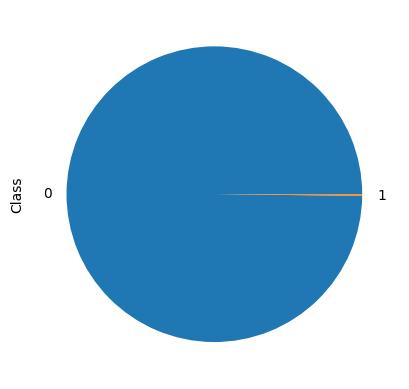

In [10]:
#Checking the distribution of target variable i.e Class, in percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

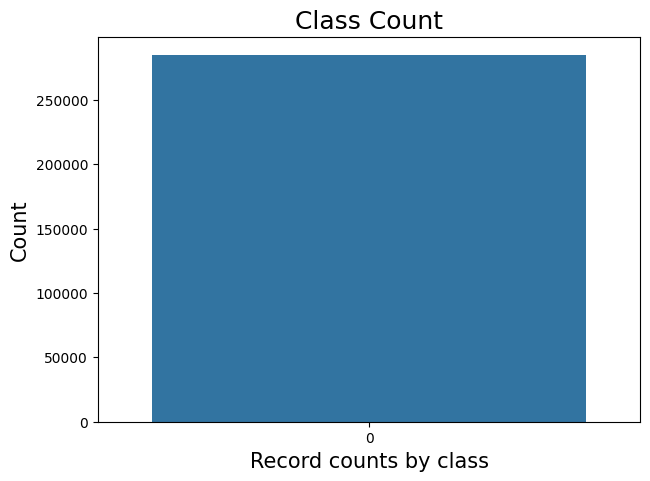

In [11]:
#Creating a bar plot for the number and percentage of fraudulent vs non-fraudulent transactions
plt.figure(figsize = (7,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize = 18)
plt.xlabel("Record counts by class",fontsize = 15)
plt.ylabel("Count",fontsize = 15)
plt.show()

In [12]:
#Checking the correlation between the features
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


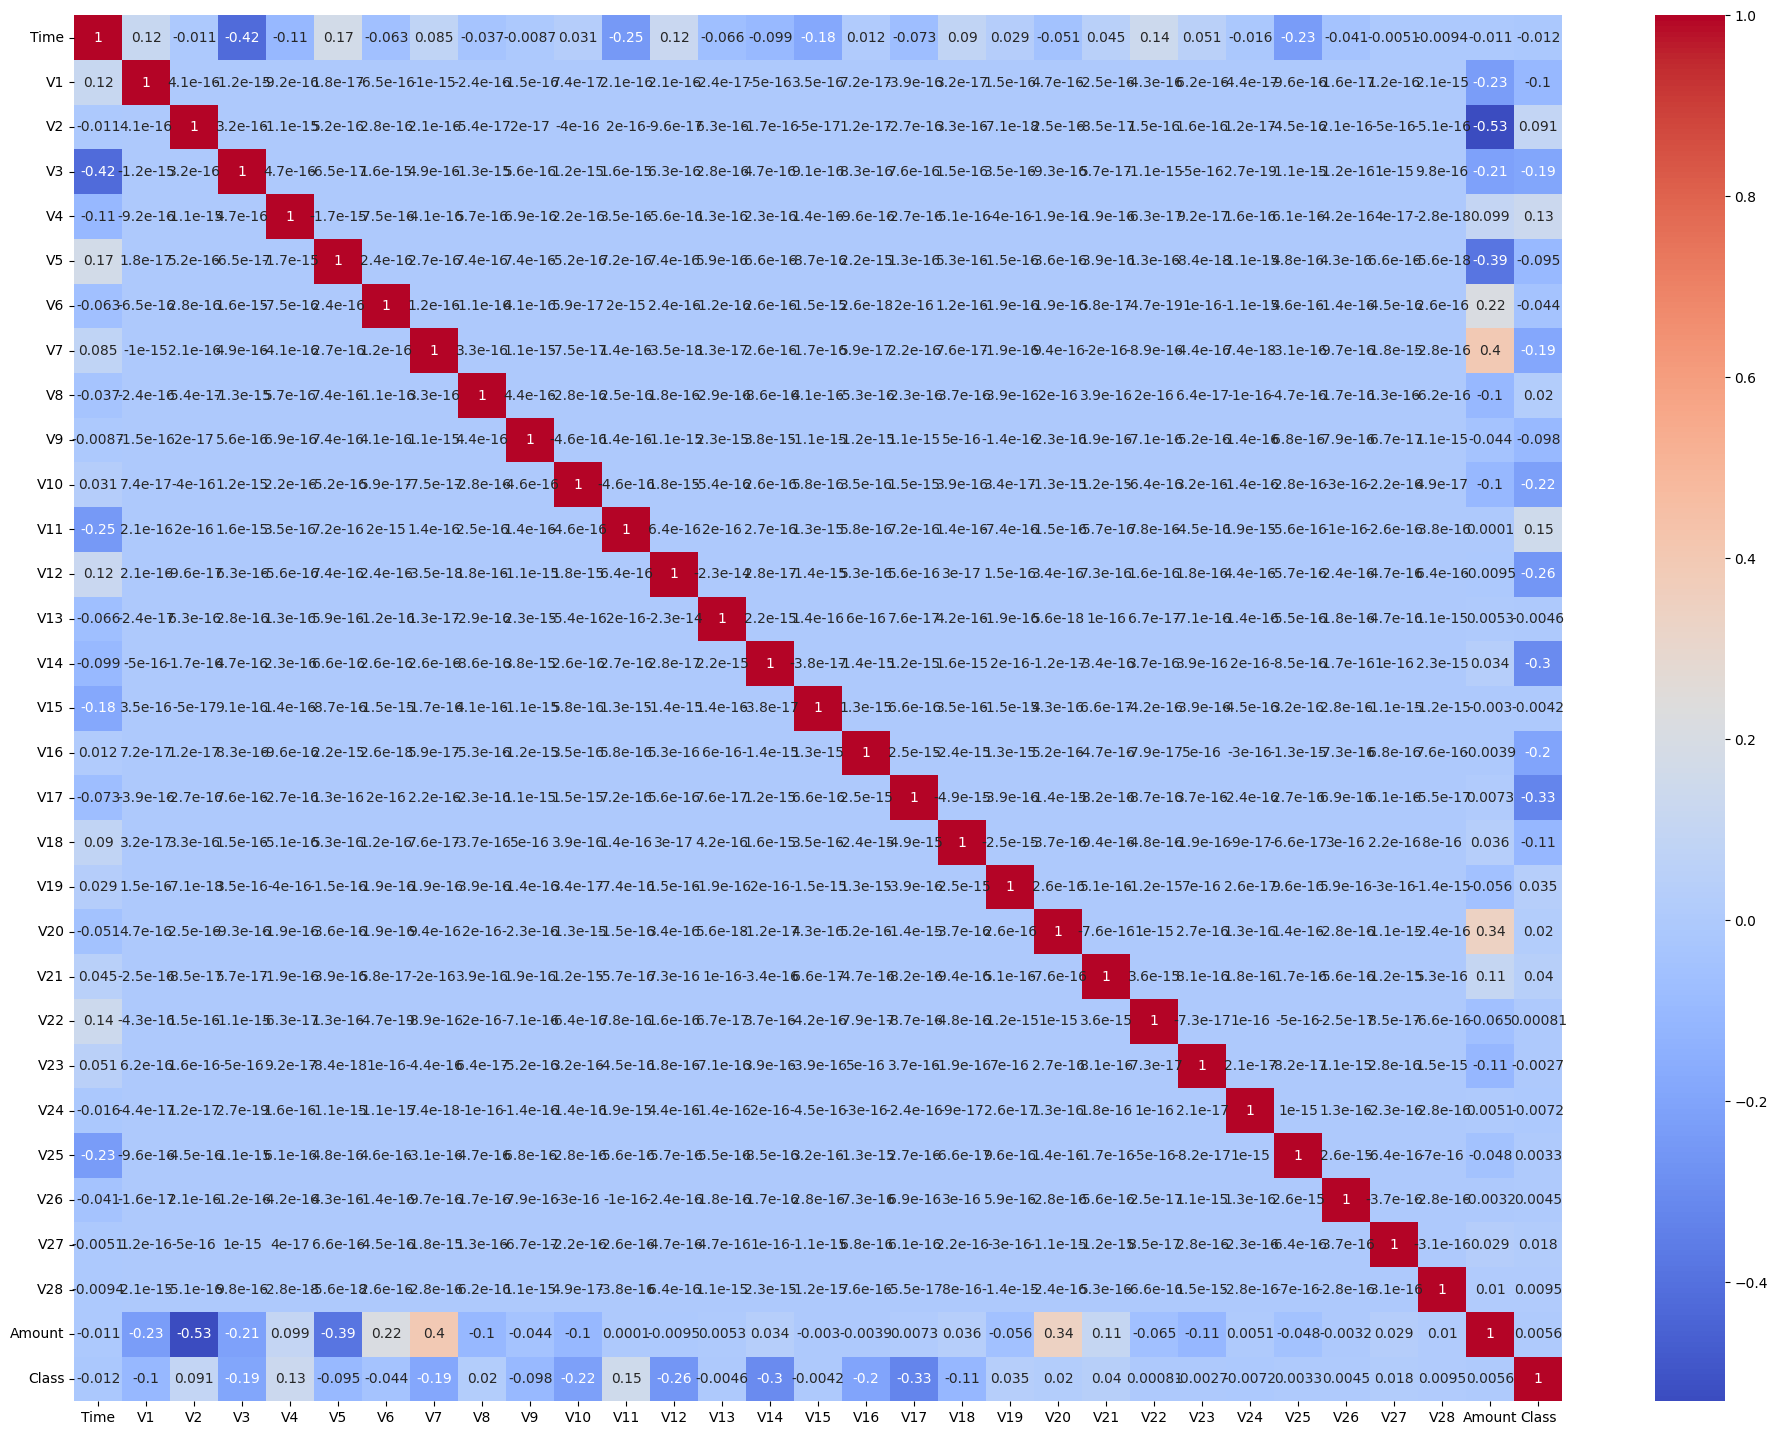

In [13]:
# Plotting heatmap of the correlation
plt.figure(figsize = (24,18))
sns.heatmap(corr, cmap = "coolwarm", annot = True)
plt.show()

#### Feature engineering

In [14]:
#Converting Time column values into time period
Delta_Time = pd.to_timedelta(df['Time'], unit = "s")

#Create derived columns mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [15]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Time_Day,Time_Hour,Time_Min
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1,23,59
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1,23,59
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1,23,59
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1,23,59


In [16]:
#Dropping unnecessary columns
df.drop('Time', axis = 1, inplace = True)
df.drop(['Time_Day','Time_Min'], axis = 1, inplace = True)

## Splitting the data into test and train

In [17]:
#Splitting the dataset into test and train
y = df["Class"]
X = df.drop(["Class"], axis = 1)

In [18]:
#checking rows of x
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
#checking rows of y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [20]:
#Spliting the dataset with train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, test_size = 0.20)

In [21]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


###### Ploting the distribution of variable

In [22]:
#Accumulating all column names under one variable
cols = list(X.columns.values)

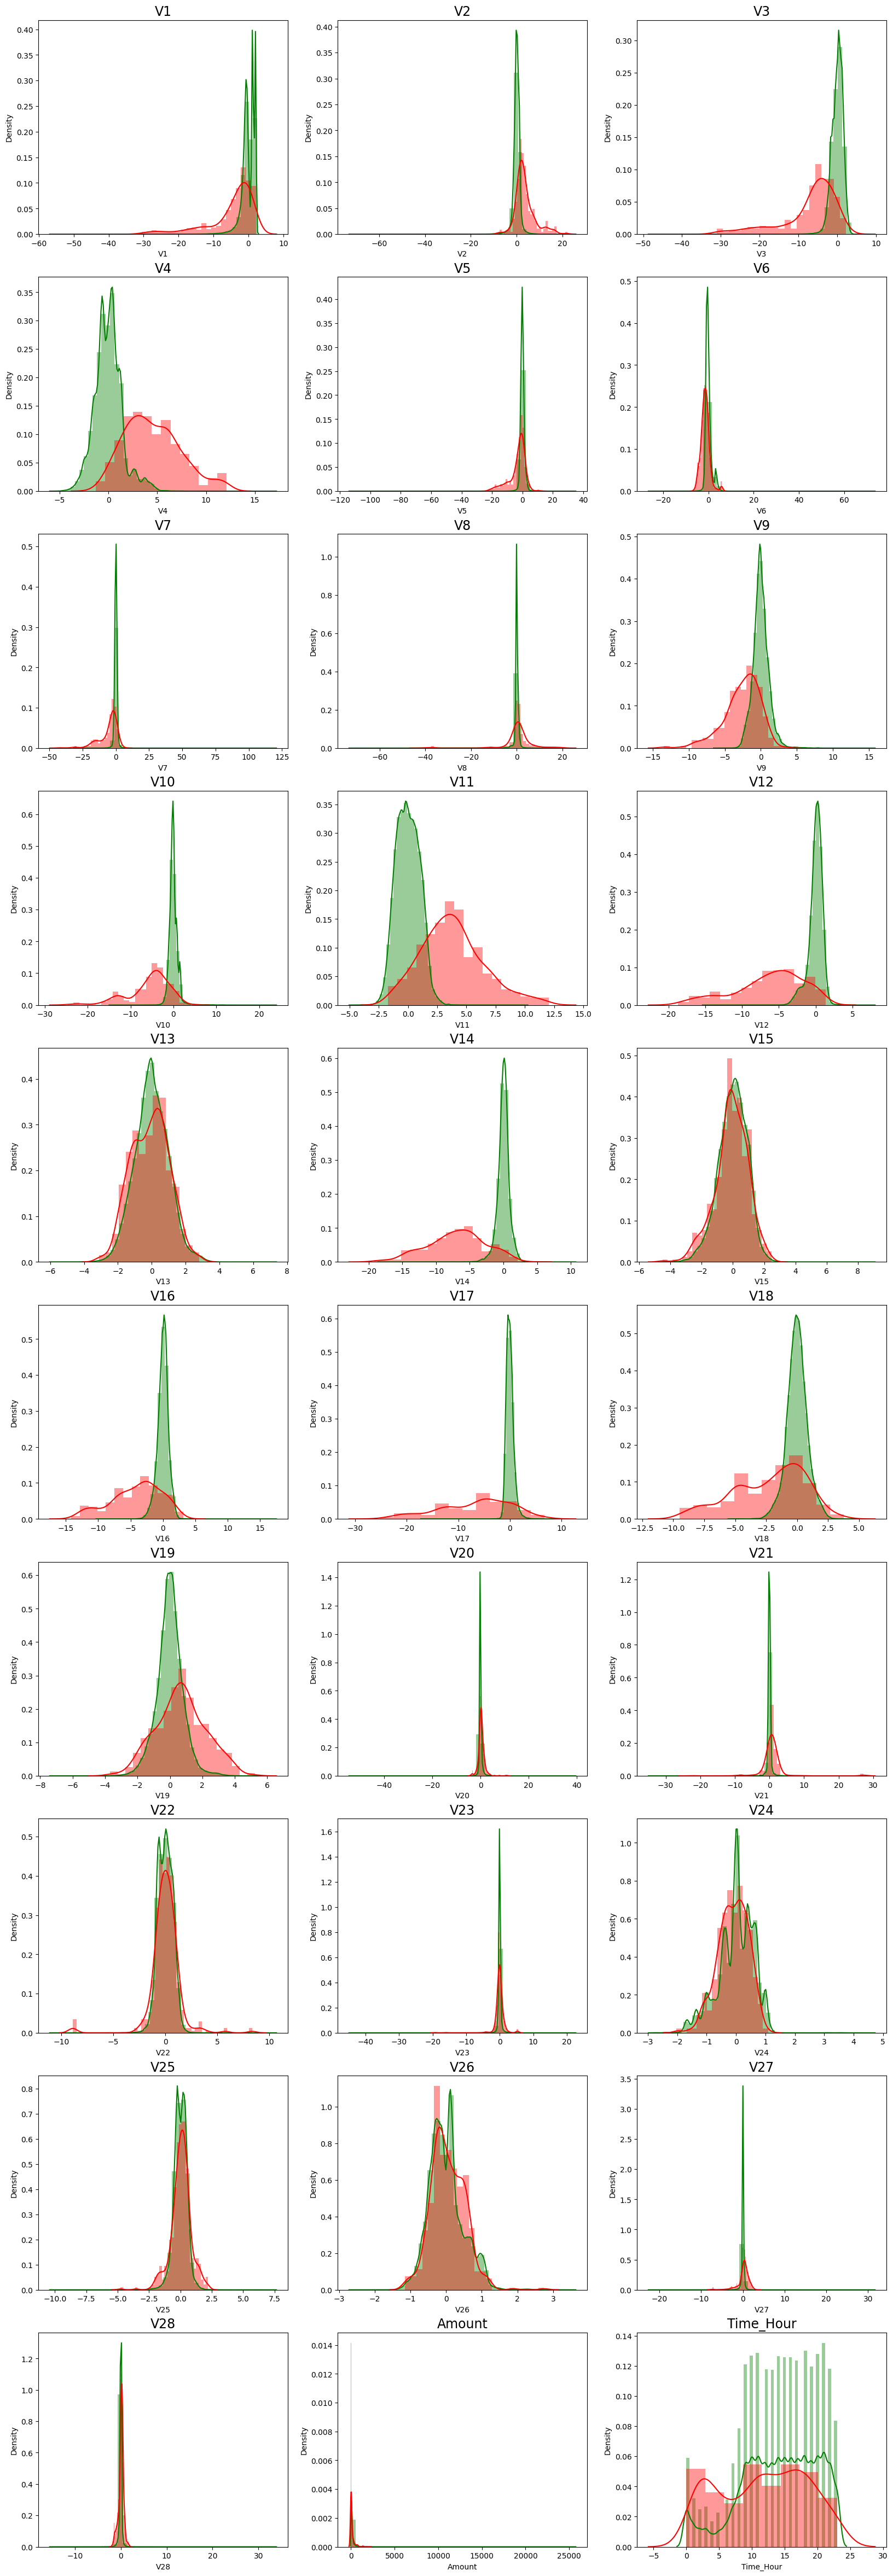

In [23]:
#Plot the histogram of class variable from dataset to check skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20,60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X[col][normal_records], color = "green")
    sns.distplot(X[col][fraud_records], color = "red")
    plt.title(col, fontsize = 17)
plt.show()

### Model Building

In [24]:
#Create a dataframe to store results
df_Results = pd.DataFrame (columns = ['Methodology', 'Model', 'Accuracy', 'roc_value', 'threshold'])

In [25]:
#Create a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    categoryNames = ["Non-Fraudalent","Fraudalent"]
    plt.title("Confusion Matrix - Test Data")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    ticks = np.arange(len(categoryNames))
    plt.Xticks(ticks, categoryNames, rotation = 45)
    plt.yticks(ticks, categoryNames)
    s = [["TN", "FP"],["FN", "TP"]]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j]) + "=" + str(s[i][j]), fontsize=12)
    plt.show()

In [26]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def buildAndRunLogisticModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Initialize parameters
    num_c = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    # Create logistic regression models
    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_c,
        penalty='l2',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='newton-cg',
        tol=10
    )

    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_c,
        penalty='l1',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='liblinear',
        tol=10
    )

    # Fit models
    searchCV_l2.fit(X_train, y_train)
    searchCV_l1.fit(X_train, y_train)

    # Display AUC scores and coefficients
    print('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
    print('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

    print('Parameters for l1 regularization')
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)
    print(searchCV_l1.scores_)

    print('Parameters for l2 regularization')
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)
    print(searchCV_l2.scores_)

    # Predict values and probabilities
    y_pred_l1 = searchCV_l1.predict(X_test)
    y_pred_l2 = searchCV_l2.predict(X_test)

    y_pred_prob_l1 = searchCV_l1.predict_proba(X_test)[:, 1]
    y_pred_prob_l2 = searchCV_l2.predict_proba(X_test)[:, 1]

    # Calculate accuracies
    accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

    # Display accuracy and classification metrics
    print('Accuracy of Logistic model with l2 regularization: {0}'.format(accuracy_l2))
    print('Confusion Matrix')
    print(metrics.confusion_matrix(y_test, y_pred_l2))
    print("Classification Report")
    print(classification_report(y_test, y_pred_l2))

    print('Accuracy of Logistic model with l1 regularization: {0}'.format(accuracy_l1))
    print('Confusion Matrix')
    print(metrics.confusion_matrix(y_test, y_pred_l1))
    print("Classification Report")
    print(classification_report(y_test, y_pred_l1))

    # Calculate and display ROC values and curves
    l2_roc_value = roc_auc_score(y_test, y_pred_prob_l2)
    print("l2 roc_value: {0}".format(l2_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_l2)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("l2 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append results to DataFrame
    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology, 'Model': 'Logistic Regression with L2 Regularization', 'Accuracy': accuracy_l2, "roc_value": l2_roc_value, 'threshold': threshold}, index=[0]), ignore_index=True)

    l1_roc_value = roc_auc_score(y_test, y_pred_prob_l1)
    print("l1 roc_value: {0}".format(l1_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_l1)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("l1 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append results to DataFrame
    df_Results = df_Results.append({'Methodology': Methodology, 'Model': 'Logistic Regression with L1 Regularization', 'Accuracy': accuracy_l1, "roc_value": l1_roc_value, 'threshold': threshold}, ignore_index=True)
    return df_Results

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def buildAndRunKNNModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Create KNN model and fit the model with the standardized train dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    print("model score")
    print(score)

    # Accuracy
    y_pred = knn.predict(X_test_scaled)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    print("Confusion Matrix")
    print(metrics.confusion_matrix(y_test, y_pred))
    print("classification Report")
    print(metrics.classification_report(y_test, y_pred))

    knn_probs = knn.predict_proba(X_test_scaled)[:, 1]

    # Calculate roc auc
    knn_roc_value = metrics.roc_auc_score(y_test, knn_probs)
    print("KNN roc_value: {0}".format(knn_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("KNN threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", "{:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology, 'Model': 'KNN', 'Accuracy': score, "roc_value": knn_roc_value, 'threshold': threshold}, index=[0]), ignore_index=True)
    return df_Results


In [28]:
def Plot_confusion_matrix(y_test, pred_test):
    conf_matrix = confusion_matrix(y_test, pred_test)
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()

    categoryNames = ['No Fraud', 'Fraud']
    ticks = np.arange(len(categoryNames))

    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [29]:
def buildAndRunTreeModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    criteria = ["gini", "entropy"]
    scores = {}

    for c in criteria:
        dt = DecisionTreeClassifier(criterion=c, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)
        tree_preds = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_preds)
        scores = test_score
        print(c + " score: {0}".format(test_score))
        print("Confusion Matrix")
        Plot_confusion_matrix(y_test, y_pred)
        print("classification Report")
        print(classification_report(y_test, y_pred))
        print(c + " tree_roc_value: {0}".format(tree_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr-fpr)]
        print("Tree threshold: {0}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the test dataset", "{:.1%}".format(roc_auc))
        plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
        plt.legend(loc=4)
        plt.show()

        df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology, 'Model': 'Tree Model with {0} criteria'.format(c), 'Accuracy': test_score, "roc_value" : tree_roc_value, 'threshold': threshold}, index=[0]), ignore_index=True)
        return df_Results

In [30]:
import time
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def buildAndRunRandomForestModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt', random_state=42)

  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)

  # Predict on test data
  RF_predictions = RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))

  # Confusion Matrix
  cm_display = ConfusionMatrixDisplay.from_estimator(RF_model, X_test, y_test, display_labels=["Class 0", "Class 1"])
  cm_display.plot(cmap=plt.cm.Blues, values_format='.0f')
  plt.title("Confusion Matrix")
  plt.show()

  # Classification Report
  print("Classification Report")
  print(classification_report(y_test, RF_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate ROC AUC
  roc_value = roc_auc_score(y_test, rf_probs)
  print("Random Forest roc_value:", roc_value)
  fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr - fpr)]
  print("Random Forest threshold:", threshold)
  roc_auc = auc(fpr, tpr)
  print("ROC for the test dataset: {:.1%}".format(roc_auc))
  plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  n_estimators = RF_model.n_estimators
  max_depth = RF_model.max_depth
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology, 'Model': f'Random Forest (n_estimators={n_estimators}, max_depth={max_depth})', 'Accuracy': RF_test_score, "roc_value": roc_value, 'threshold': threshold}, index=[0]), ignore_index=True)

  return df_Results


In [31]:
# Created a common function to fit and predict on an XGBoost model:
def buildAndRunXGBoostModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Evaluate XGBoost model
    XGB_model = XGBClassifier(random_state=42)
    XGB_model.fit(X_train, y_train)
    y_pred = XGB_model.predict(X_test)
    XGB_test_score = XGB_model.score(X_test, y_test)
    print("Model Accuracy: {0}".format(XGB_test_score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
    # Probabilities for each class
    XGB_probs = XGB_model.predict_proba(X_test)[:, 1]
    # Calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)
    print("XGBoost roc_value: {0}".format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", "{:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology, 'Model': 'XGBoost', 'Accuracy': XGB_test_score, 'roc_value': XGB_roc_value, 'threshold': threshold}, index=[0]), ignore_index=True)
    return df_Results

In [32]:
# Created a common function to fit and predict on an SVM model
def buildAndRunSVMModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Evaluate SVM model with sigmoid kernel model
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, roc_auc_score

    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train, y_train)
    y_pred_SVM = clf.predict(X_test)
    SVM_Score = accuracy_score(y_test, y_pred_SVM)
    print("accuracy_score : {0}".format(SVM_Score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_SVM)
    print("classification Report")
    print(classification_report(y_test, y_pred_SVM))
    # Run classifier
    classifier = SVC(kernel='sigmoid', probability=True)
    svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    # Calculate roc auc
    roc_value = roc_auc_score(y_test, svm_probs)
    print("SVM roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("SVM threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", "{:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology, 'Model': 'SVM', 'Accuracy': SVM_Score, 'roc_value': roc_value, 'threshold': threshold}, index=[0]), ignore_index=True)
    return df_Results

### Perform Cross validation with repeated KFold

In [33]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

# X is the feature set and Y is the target
for train_index, test_index in rkf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      3 ... 284802 284805 284806] TEST: [     2      6      9 ... 284800 284803 284804]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [    12     16     21 ... 284797 284801 284805]
TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1      5      7 ... 284778 284798 284799]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3      8     11 ... 284790 284791 284792]
TRAIN: [     1      2      3 ... 284803 284804 284805] TEST: [     0      4     14 ... 284793 284802 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3      5      6 ... 284800 284801 284802]
TRAIN: [     0      1      2 ... 284801 284802 284804] TEST: [     7      9     14 ... 284803 284805 284806]
TRAIN: [     0      1      3 ... 284803 284805 284806] TEST: [     2      4     18 ... 284791 284798 284804]
TRAIN: [     2      3      4 ... 284804 284805 284806] TEST: [     0      1      8 ... 284788 284792 284795]
TRAIN: [     0     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.9706724356532955
Max auc_roc for l2: 0.9833016206181433
Parameters for l1 regularization
[[-0.05778705 -0.1290278  -0.1824064   0.06440749 -0.26505931  0.09406807
   0.11744646 -0.02924941 -0.14476525 -0.1453914  -0.03536374  0.0109508
  -0.13379816 -0.22140831  0.01329408 -0.11717097 -0.22221256  0.03254352
   0.0103505   0.2330888   0.08781656 -0.02881836 -0.01487249 -0.01563919
  -0.02647845  0.00416322 -0.05053858  0.03248694 -0.0066474  -0.11634184]]
[-2.0932736]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.46465702,
        0.5025196 , 0.53296041, 0.90243609, 0.9345575 , 0.96057187,
        0.92205385, 0.92689138, 0.9525399 , 0.95181078, 0.94344011,
        0.9488581 , 0.92850476, 0.95400978, 0.90950495, 0.97350213],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.57403351,
        0.59356733, 0.61790066, 0.90493973, 0.88514839, 0.89242627,
        0.87871105, 0.88280254, 0.91289198

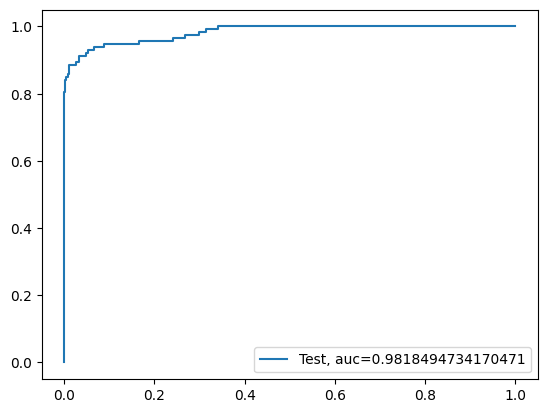

l1 roc_value: 0.8816810761842777
l1 threshold: 0.05593604187359693
ROC for the test dataset 88.2%


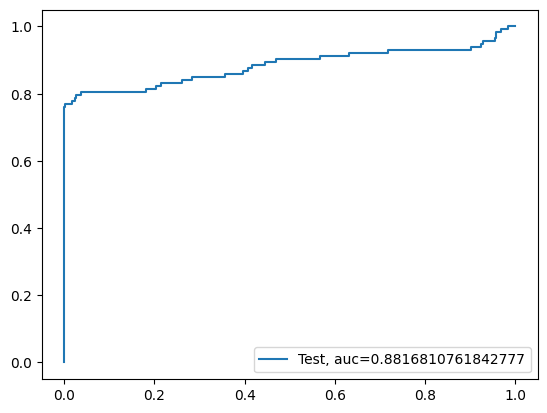

Time Taken by Model: --- 216.51375484466553 seconds ---
------------------------------------------------------------
KNN Model
model score
0.9993679886237953
Confusion Matrix
[[56842     7]
 [   29    83]]
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.92      0.74      0.82       112

    accuracy                           1.00     56961
   macro avg       0.96      0.87      0.91     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.9061351908439149
KNN threshold: 0.2
ROC for the test dataset 90.6%


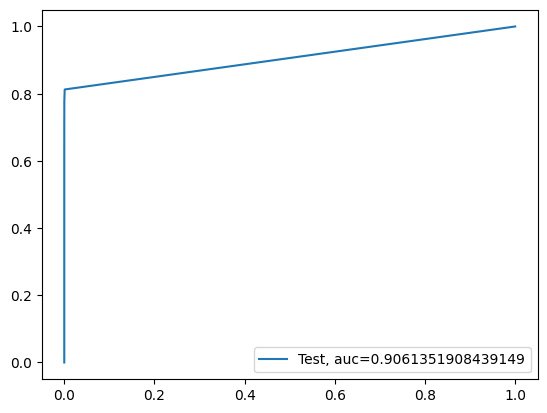

Time Taken by Model: --- 157.8564703464508 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.9989993153210092
Confusion Matrix


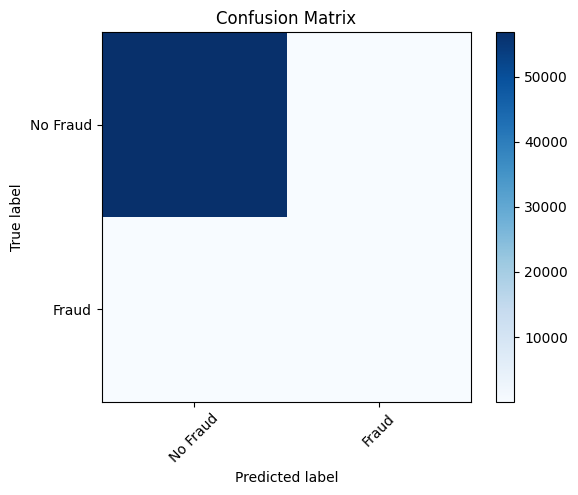

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.77      0.71      0.73       112

    accuracy                           1.00     56961
   macro avg       0.88      0.85      0.87     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8524674859213506
Tree threshold: 1.0
ROC for the test dataset 85.2%


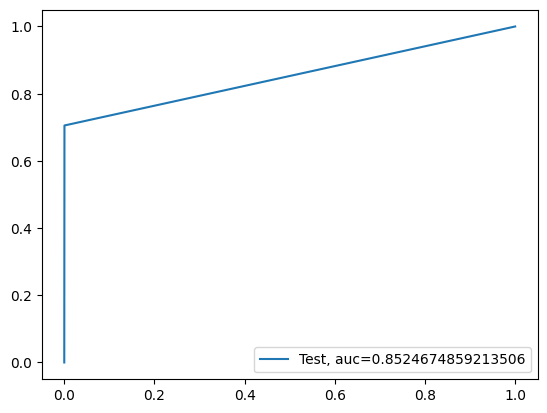

Time Taken by Model: --- 22.985320806503296 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995084355962852


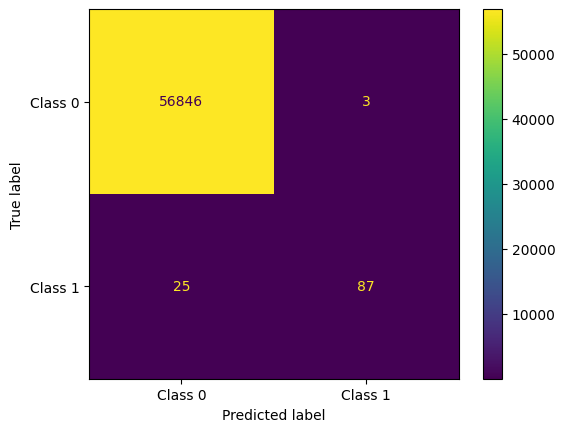

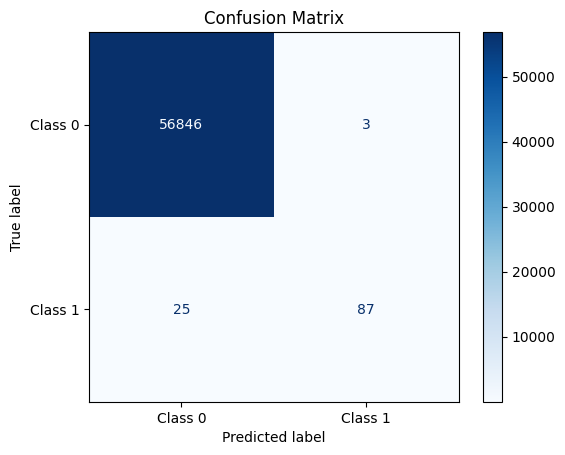

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.97      0.78      0.86       112

    accuracy                           1.00     56961
   macro avg       0.98      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.940353659318043
Random Forest threshold: 0.04
ROC for the test dataset: 94.0%


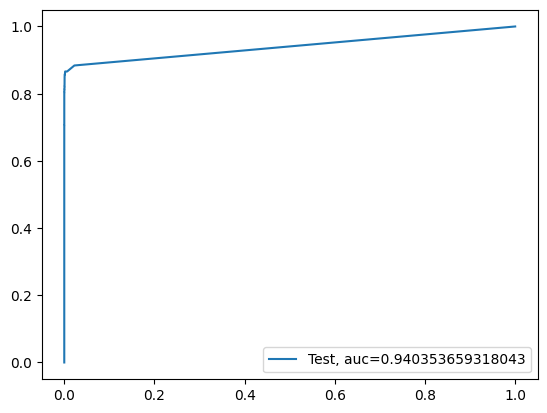

Time Taken by Model: --- 244.114089012146 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9995435473394076
Confusion Matrix


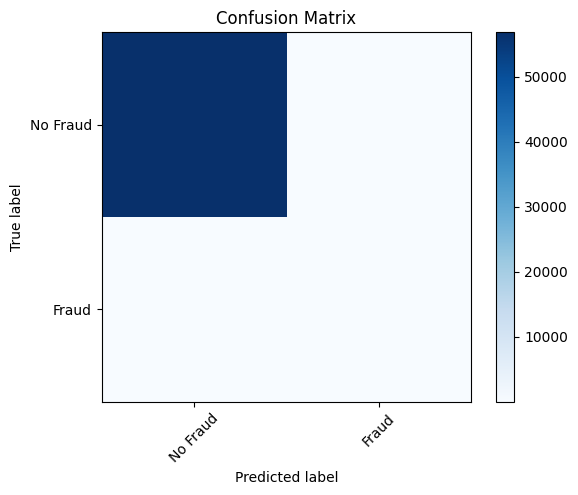

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.97      0.79      0.87       112

    accuracy                           1.00     56961
   macro avg       0.98      0.90      0.94     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9661409580015228
XGBoost threshold: 4.6300374378915876e-05
ROC for the test dataset 96.6%
Time Taken by Model: --- 81.31846499443054 seconds ---
------------------------------------------------------------
SVM model with sigmoid kernel model
accuracy_score : 0.9975597338529871
Confusion Matrix


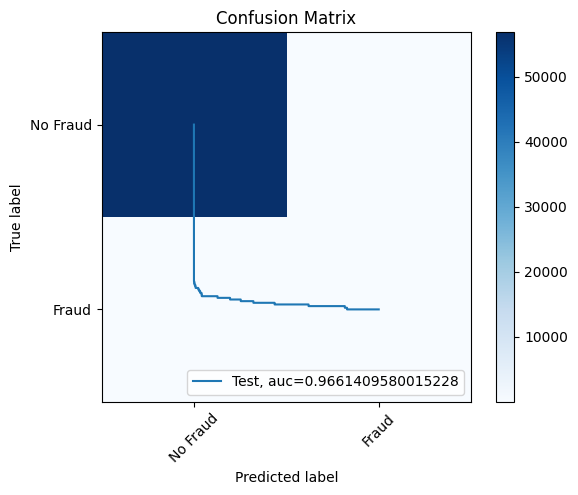

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.11      0.04      0.05       112

    accuracy                           1.00     56961
   macro avg       0.56      0.52      0.53     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.6620811586081424
SVM threshold: 0.001054149781272315
ROC for the test dataset 66.2%


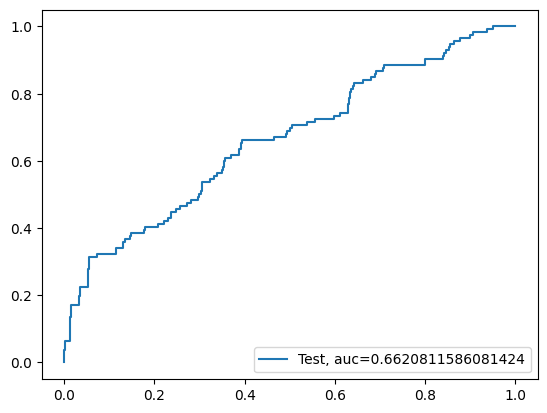

Time Taken by Model: --- 175.77617239952087 seconds ---


In [34]:
import time
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "RepeatedKfold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

print("SVM model with sigmoid kernel model")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [35]:
#checking the df_results dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998876,0.981849,0.001499
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998876,0.881681,0.055936
2,RepeatedKfold Cross Validation,KNN,0.999368,0.906135,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.998999,0.852467,1.000000
4,RepeatedKFold Cross Validation,"Random Forest (n_estimators=100, max_depth=None)",0.999508,0.940354,0.040000
5,RepeatedKFold Cross Validation,XGBoost,0.999544,0.966141,0.000046
6,RepeatedKFold Cross Validation,SVM,0.997560,0.662081,0.001054


### Results for Cross validation with repeated KFold
Looking at the accuracy and ROC value we have "Logistic Regression with L2 regularization" which has provided best results for cross validation with RepeatedKFold technique

### Perform Cross validation with StratifiedKFold

In [36]:
from sklearn.model_selection import StratifiedKFold
import time

skf = StratifiedKFold(n_splits=5, random_state=None)

# X is the feature set and Y is the target
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


Logistic Regression with L1 And L2 Regularization
Max auc_roc for l1: 0.9652106893977332
Max auc_roc for l2: 0.9824998302436573
Parameters for l1 regularization
[[-0.03660539 -0.1358827  -0.20474594  0.04333662 -0.24034598  0.08416903
   0.12654905 -0.04815306 -0.14258132 -0.1384162  -0.11668372  0.05505155
  -0.15637116 -0.24216184 -0.03137093 -0.09904364 -0.23133976  0.05582481
   0.02122044  0.20503748  0.09013502  0.00148754 -0.03796378 -0.00392139
  -0.14797782 -0.00701001 -0.06594801 -0.00660368 -0.00656465 -0.12981985]]
[-2.0409044]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.48341269,
        0.44979055, 0.48500892, 0.78098262, 0.9497821 , 0.94525947,
        0.91827811, 0.91446679, 0.94989144, 0.94933682, 0.94178407,
        0.94900653, 0.92481293, 0.94421561, 0.9164553 , 0.97793244],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.54612019,
        0.57709187, 0.60597219, 0.84651057, 0.93343227, 0.93465714,
        0.92629828, 0.92557122, 0.9448154

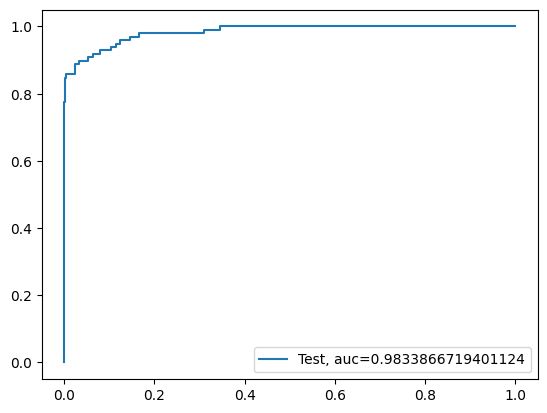

l1 roc_value: 0.8890758561483437
l1 threshold: 0.021087492766199863
ROC for the test dataset 88.9%


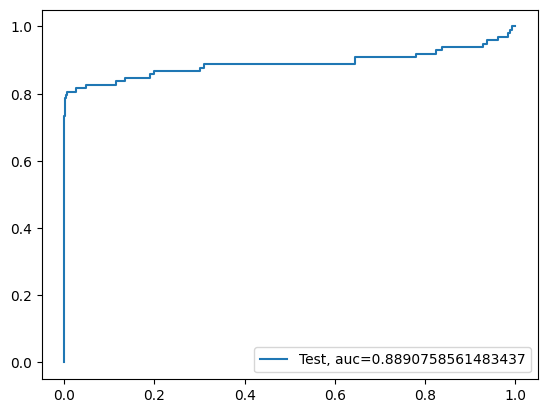

Time Taken by Model: --- 211.87276077270508 seconds ---
------------------------------------------------------------
KNN Model
model score
0.9994733238531627
Confusion Matrix
[[56860     3]
 [   27    71]]
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.72      0.83        98

    accuracy                           1.00     56961
   macro avg       0.98      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8774533097272463
KNN threshold: 0.2
ROC for the test dataset 87.7%


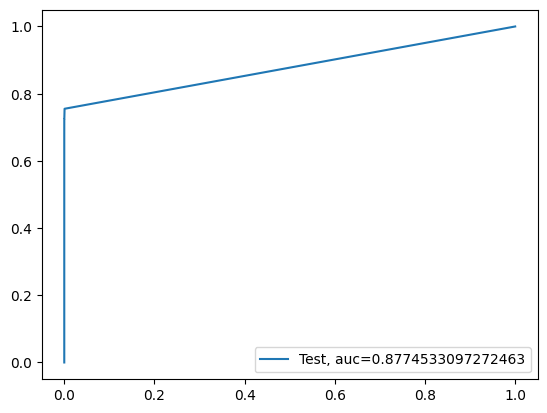

Time Taken by Model: --- 174.58220624923706 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.998841312476958
Confusion Matrix


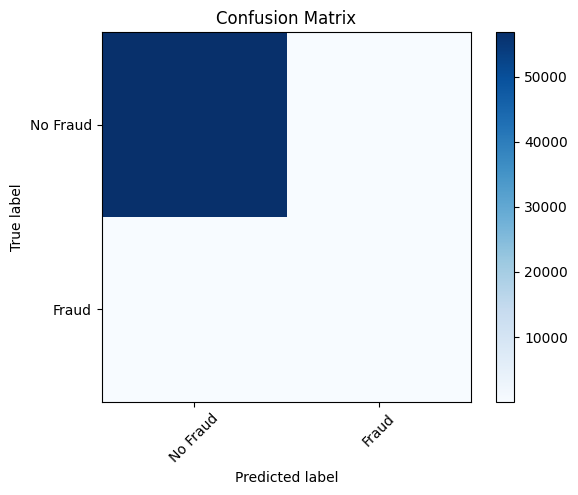

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8262492341959029
Tree threshold: 1.0
ROC for the test dataset 82.6%


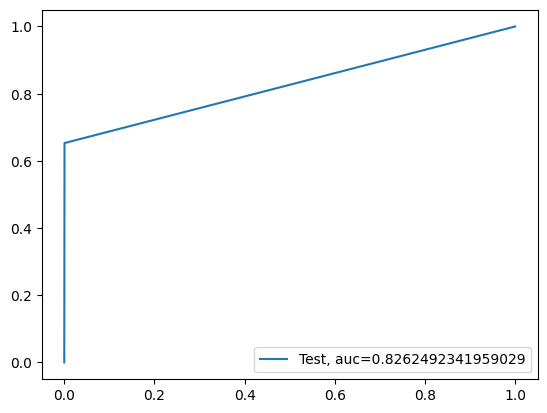

Time Taken by Model: --- 23.224442720413208 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994382121100402


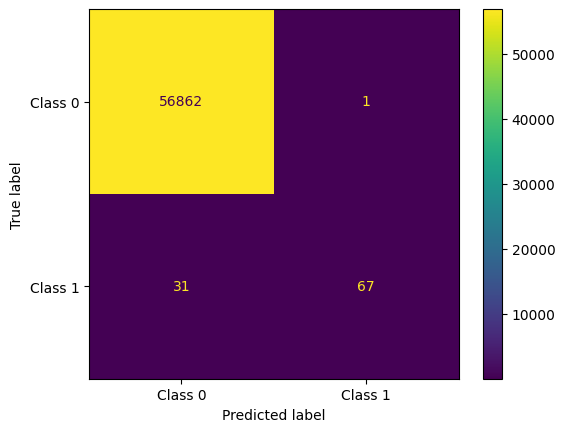

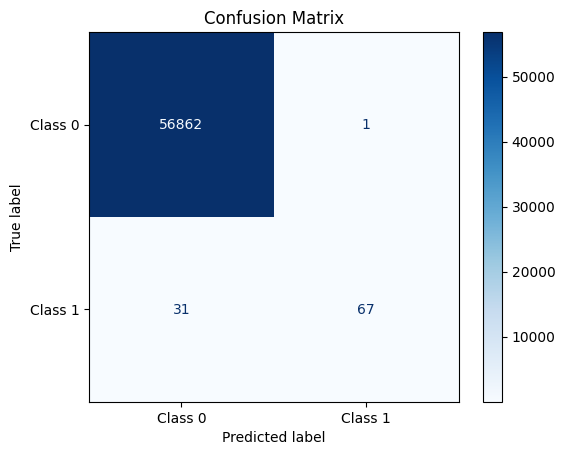

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset: 94.6%


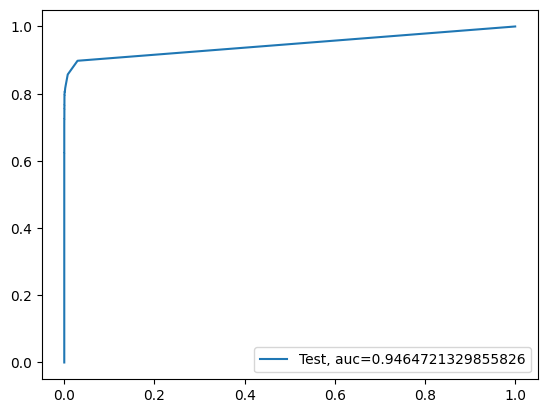

Time Taken by Model: --- 236.12296843528748 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


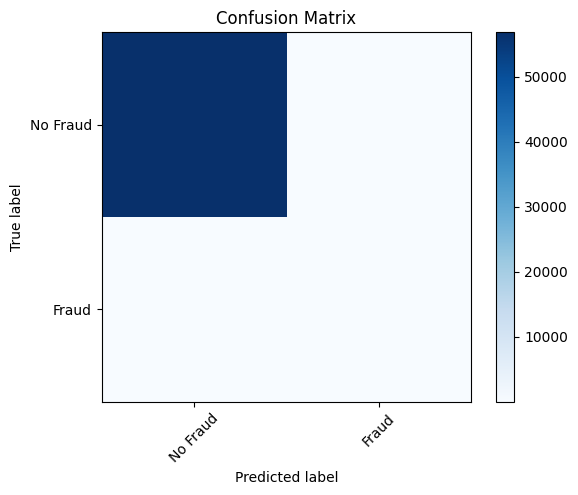

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9728125638170081
XGBoost threshold: 0.00010038274194812402
ROC for the test dataset 97.3%
Time Taken by Model: --- 80.07167983055115 seconds ---
------------------------------------------------------------
SVM model with sigmoid kernel model
accuracy_score : 0.9982795245869981
Confusion Matrix


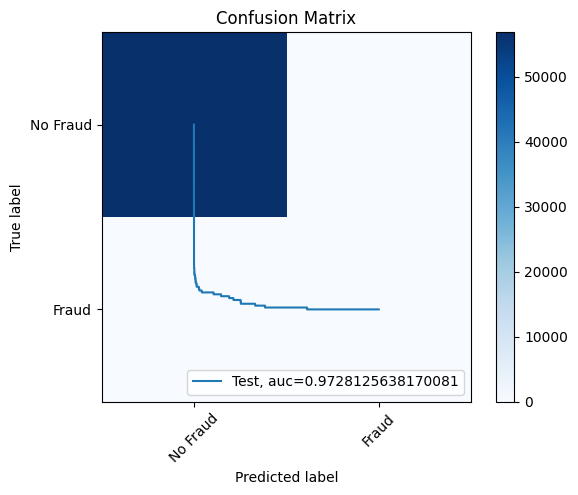

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.5982296511450543
SVM threshold: 0.001695337463795382
ROC for the test dataset 59.8%


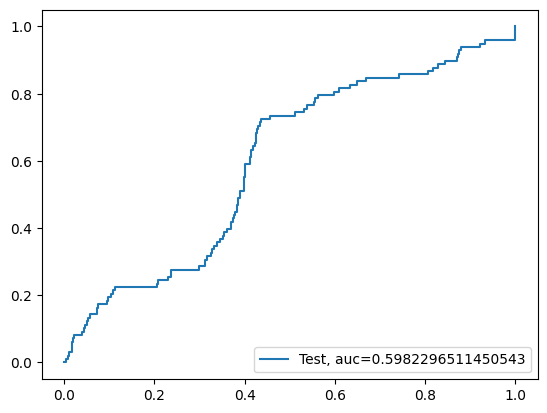

Time Taken by Model: --- 3144.0907459259033 seconds ---


In [37]:
 # Run Logistic Regression with L1 And L2 Regularization
print("Logistic Regression with L1 And L2 Regularization")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run Decision Tree Models with 'gini' and 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run SVM model with sigmoid kernel model
print("SVM model with sigmoid kernel model")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [38]:
#checking the df_results dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998876,0.981849,0.001499
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998876,0.881681,0.055936
2,RepeatedKfold Cross Validation,KNN,0.999368,0.906135,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.998999,0.852467,1.000000
4,RepeatedKFold Cross Validation,"Random Forest (n_estimators=100, max_depth=None)",0.999508,0.940354,0.040000
5,RepeatedKFold Cross Validation,XGBoost,0.999544,0.966141,0.000046
6,RepeatedKFold Cross Validation,SVM,0.997560,0.662081,0.001054
7,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998771,0.983387,0.001554
8,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998754,0.889076,0.021087
9,StratifiedKFold Cross Validation,KNN,0.999473,0.877453,0.200000


### Results for Cross validation with Stratified KFold
Looking at the ROC value we have "Logistic Regression with L2 regularization" which has provided best results for cross validation with StratifiedKFold technique

### Conclusion:
    As the results shows Logistic Regression with L2 regularization" provided best results for cross validation with StratifiedKFold technique

In [39]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

clf = linear_model.LogisticRegressionCV(
    Cs=num_C,
    penalty='l2',
    scoring='roc_auc',
    cv=cv_num,
    random_state=42,
    max_iter=10000,
    fit_intercept=True,
    solver='newton-cg',
    tol=10,
)
clf.fit(X_train_SKF_cv, y_train_SKF_cv)
print('Max auc_roc for l2:', clf.scores_[1].mean(axis=0).max())

print('Parameters for L2 Regularisation')
print(clf.coef_)
print(clf.intercept_)
print(clf.scores_)

# Find predicted values
y_pred_l2 = clf.predict(X_test)

# Find predicted probabilities
y_pred_probs_l2 = clf.predict_proba(X_test)[:,1]

# Accuracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)

print("Accuracy of the logistic regression with l2 regularization : {0}".format(Accuracy_l2))

l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2_roc_value : {0}".format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr - fpr)]
print("l2 threshold : {0}".format(threshold))

Max auc_roc for l2: 0.9824998302436573
Parameters for L2 Regularisation
[[ 0.00683334  0.06145934 -0.06703104  0.21837008  0.05400372 -0.0319603
  -0.02280335 -0.1149601  -0.06954056 -0.16366435  0.12779    -0.19159896
  -0.03711445 -0.36059637  0.00364854 -0.08799108 -0.07288165 -0.0007583
   0.00394511 -0.0279599   0.03822224  0.02337054 -0.01173993 -0.00997821
  -0.00657592  0.00627513 -0.01025023 -0.00174467  0.00039791 -0.00096784]]
[-7.40641365]
{1: array([[0.69243733, 0.69420152, 0.71447107, 0.83768575, 0.95579612,
        0.97136042, 0.98915673, 0.99464431, 0.99129517, 0.99071237,
        0.99096601, 0.99096601, 0.99096601, 0.99096601, 0.99096601,
        0.99096601, 0.99096601, 0.99096601, 0.99096601, 0.99096601],
       [0.60700243, 0.60865586, 0.62914551, 0.76884136, 0.90900227,
        0.94879974, 0.9604112 , 0.98181412, 0.98547001, 0.98328227,
        0.97955152, 0.97955152, 0.97955152, 0.97955152, 0.97955152,
        0.97955152, 0.97955152, 0.97955152, 0.97955152, 0.97955

In [40]:
#Checking for the coefficient values
clf.coef_

array([[ 0.00683334,  0.06145934, -0.06703104,  0.21837008,  0.05400372,
        -0.0319603 , -0.02280335, -0.1149601 , -0.06954056, -0.16366435,
         0.12779   , -0.19159896, -0.03711445, -0.36059637,  0.00364854,
        -0.08799108, -0.07288165, -0.0007583 ,  0.00394511, -0.0279599 ,
         0.03822224,  0.02337054, -0.01173993, -0.00997821, -0.00657592,
         0.00627513, -0.01025023, -0.00174467,  0.00039791, -0.00096784]])

In [41]:
# Creating a datafrome with the coefficient values
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(clf.coef_))], axis=1)
coefficients.columns = ['Feature','Importance Coefficient']

In [42]:
coefficients

,Feature,Importance Coefficient
0,V1,0.006833
1,V2,0.061459
2,V3,-0.067031
3,V4,0.218370
4,V5,0.054004
5,V6,-0.031960
6,V7,-0.022803
7,V8,-0.114960
8,V9,-0.069541
9,V10,-0.163664


#### Print the important features of the best model to understand the dataset

• This will not give much explanation on the already transformed dataset.
• But it will help us in understanding if the dataset is not PCA transformed.

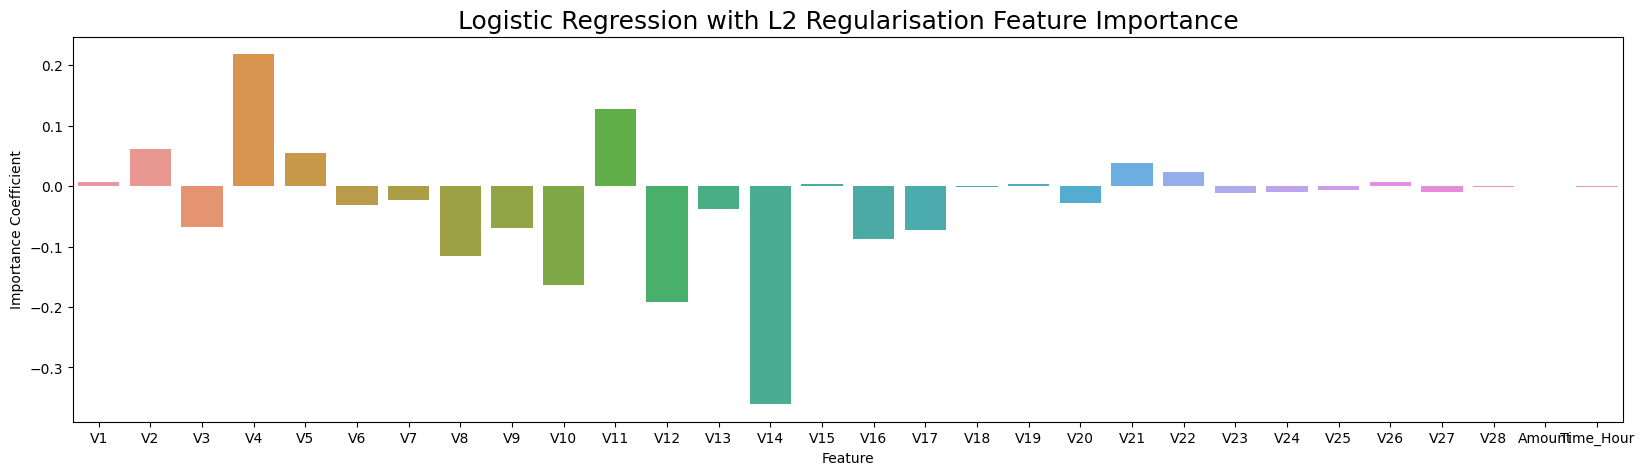

In [43]:
# Plotting the coefficient values
plt.figure(figsize=(20, 5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)
plt.show()

Hence it implies that V4, V5, V11 has positive importance whereas V10, V12, V14 seems to have -ve negative impact on the prediction.

### Model Building With Balancing Classes

Performing class balancing with:
• Random Oversampling
• SMOTE
• ADASYN

### Oversampling with RandomOverSampler with StratifiedKFold Cross Validation
• We will use Random Oversampling method to handle the class imbalance

In [44]:
# Creating the dataset with RondomOverSampler and StratifiedKFoLd
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
skf = StratifiedKFold(n_splits = 5, random_state = None)
for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    ROS = RandomOverSampler(sampling_strategy = 0.5)
    X_over, y_over = ROS.fit_resample(X_train, y_train)
X_over = pd.DataFrame(data = X_over, columns=cols)

Logistic Regression with L1 And L2 Regularization
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9864298282199746
Parameters for l1 regularization
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

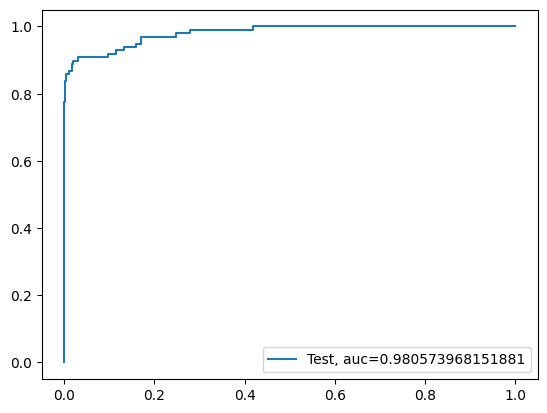

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


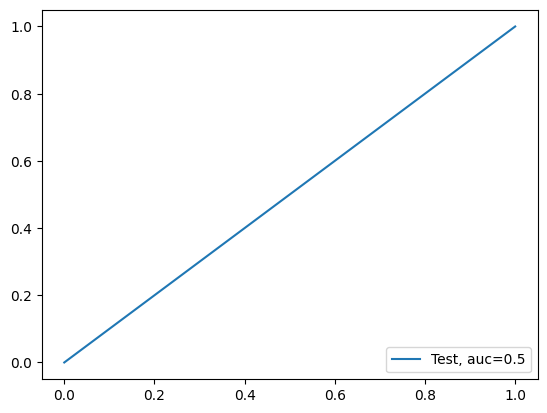

Time Taken by Model: --- 291.41900610923767 seconds ---
------------------------------------------------------------
KNN Model
model score
0.9990344270641316
Confusion Matrix
[[56846    17]
 [   38    60]]
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.78      0.61      0.69        98

    accuracy                           1.00     56961
   macro avg       0.89      0.81      0.84     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8111044375543511
KNN threshold: 0.4
ROC for the test dataset 81.1%


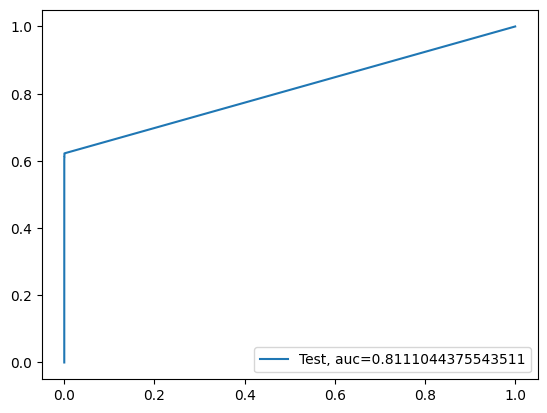

Time Taken by Model: --- 235.0390031337738 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.9990344270641316
Confusion Matrix


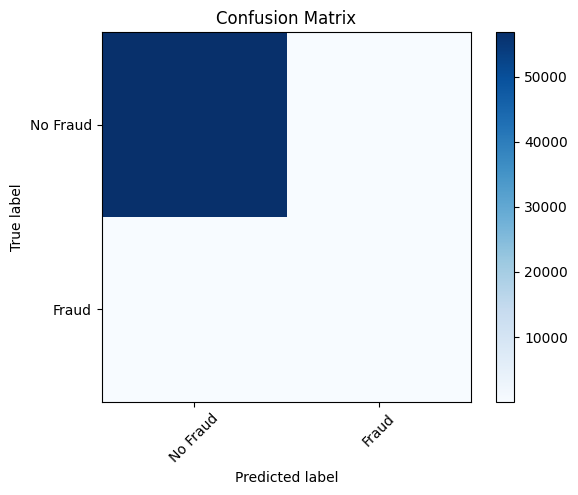

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.78      0.61      0.69        98

    accuracy                           1.00     56961
   macro avg       0.89      0.81      0.84     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8059729668910633
Tree threshold: 1.0
ROC for the test dataset 80.6%


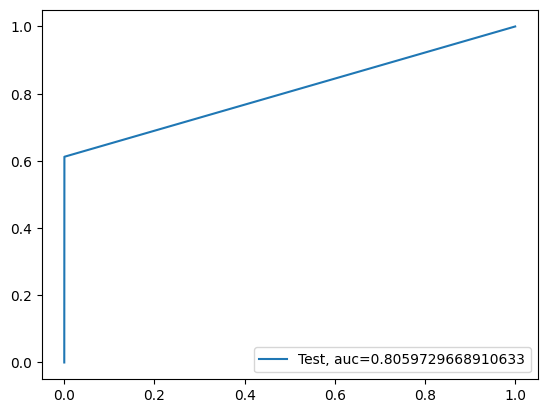

Time Taken by Model: --- 12.15706181526184 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995084355962852


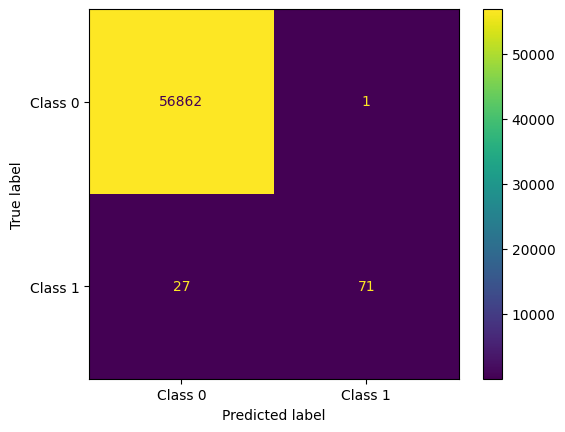

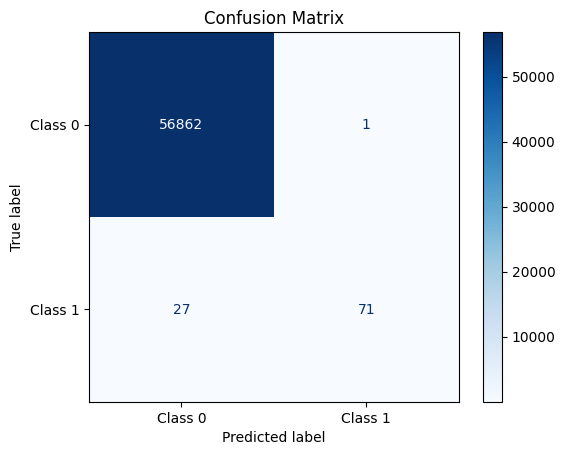

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.72      0.84        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9560802602172712
Random Forest threshold: 0.01
ROC for the test dataset: 95.6%


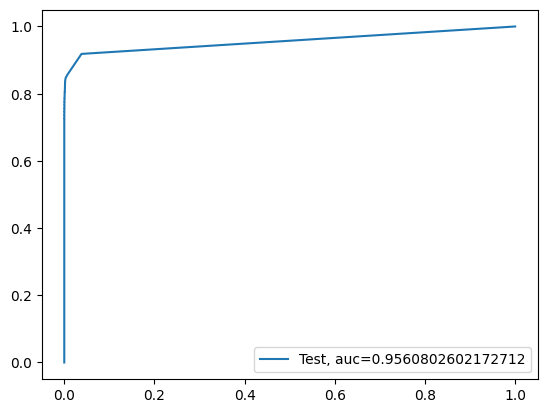

Time Taken by Model: --- 188.53883337974548 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


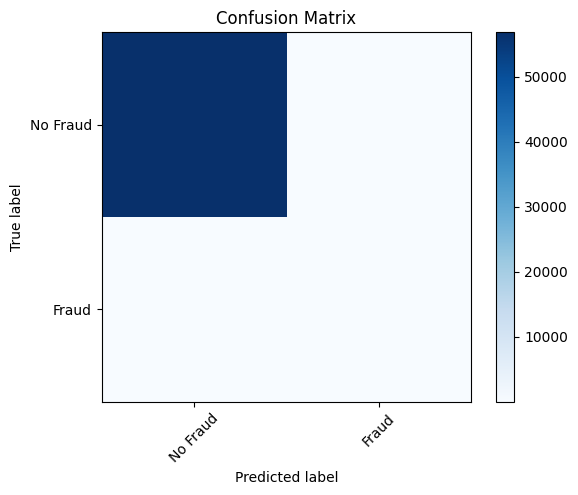

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.73      0.83        98

    accuracy                           1.00     56961
   macro avg       0.97      0.87      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9799369196353426
XGBoost threshold: 3.327436570543796e-05
ROC for the test dataset 98.0%
Time Taken by Model: --- 110.30093097686768 seconds ---
------------------------------------------------------------


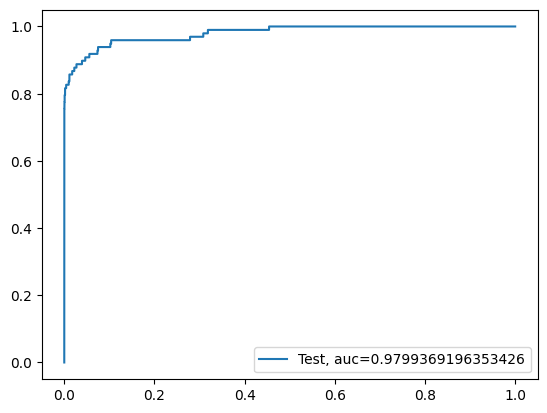

In [45]:
Data_Imbalance_Handling = "Random OverSampling StratifiedKFold Cross Validation"

# Run Logistic Regression with L1 And L2 Regularization
print("Logistic Regression with L1 And L2 Regularization")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run Decision Tree Models with 'gini' and 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

In [46]:
#checking the df_results dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998876,0.981849,0.001499
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998876,0.881681,0.055936
2,RepeatedKfold Cross Validation,KNN,0.999368,0.906135,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.998999,0.852467,1.000000
4,RepeatedKFold Cross Validation,"Random Forest (n_estimators=100, max_depth=None)",0.999508,0.940354,0.040000
5,RepeatedKFold Cross Validation,XGBoost,0.999544,0.966141,0.000046
6,RepeatedKFold Cross Validation,SVM,0.997560,0.662081,0.001054
7,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998771,0.983387,0.001554
8,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998754,0.889076,0.021087
9,StratifiedKFold Cross Validation,KNN,0.999473,0.877453,0.200000


### Results for Random Oversampling  with StratifiedKFold Technique
Looking at the Accuracy and ROC value we have XGBoost which has provided best results for Random Oversampling and StratifiedKFold technique

### Oversampling with SMOTE Oversampling
We will use SMOTE oversampling method to handle the class imbalance

In [47]:
# Creating the dataset with RondomOverSampler and StratifiedKFoLd
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling
skf = StratifiedKFold(n_splits = 5, random_state = None)
for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    SMOTE = over_sampling.SMOTE(random_state = 0)
    X_train_SMOTE , y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

X_train_SMOTE = pd.DataFrame(data = X_train_SMOTE, columns=cols)

Logistic Regression with L1 And L2 Regularization
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9930151908600335
Parameters for l1 regularization
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

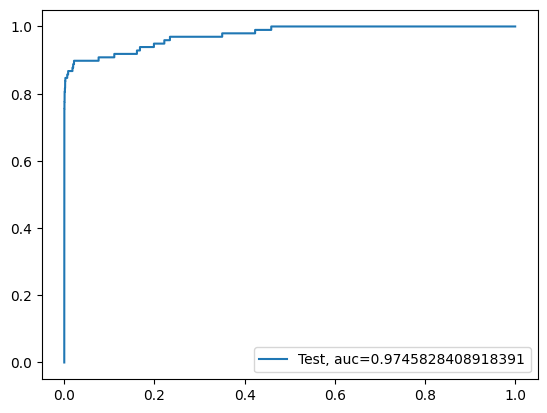

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


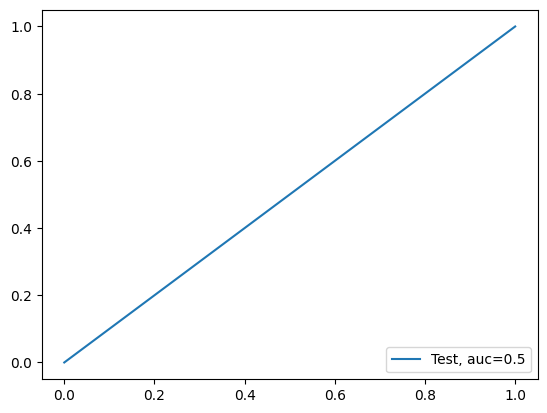

Time Taken by Model: --- 382.29946208000183 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9972437281648847
Confusion Matrix
[[56738   125]
 [   32    66]]
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.35      0.67      0.46        98

    accuracy                           1.00     56961
   macro avg       0.67      0.84      0.73     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8461366327302248
KNN threshold: 0.2
ROC for the test dataset 84.6%


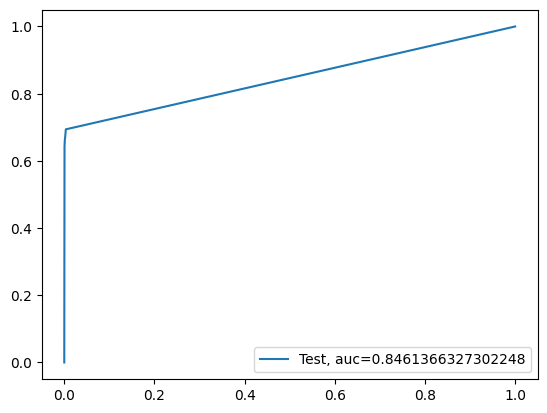

Time Taken by Model: --- 314.02229166030884 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.9977528484401608
Confusion Matrix


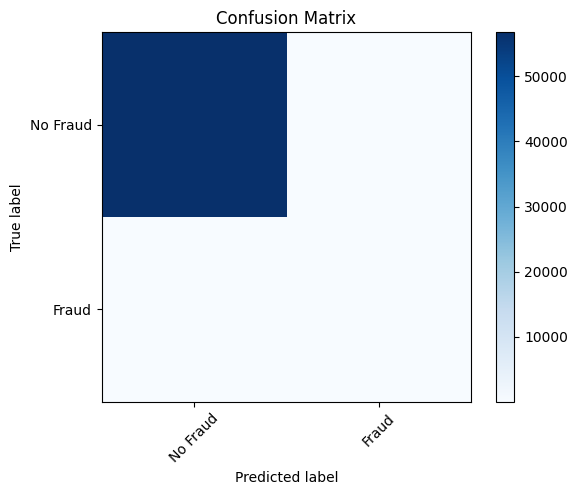

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8511703029874526
Tree threshold: 1.0
ROC for the test dataset 85.1%


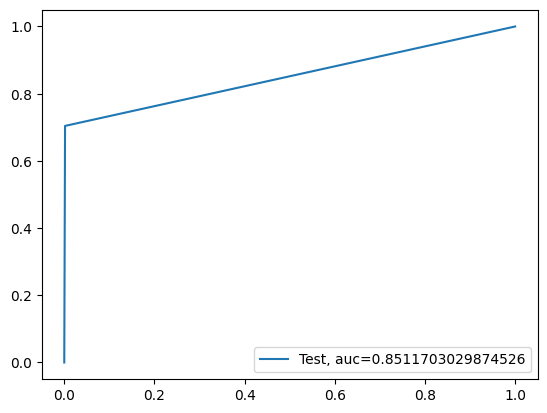

Time Taken by Model: --- 50.6787588596344 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724


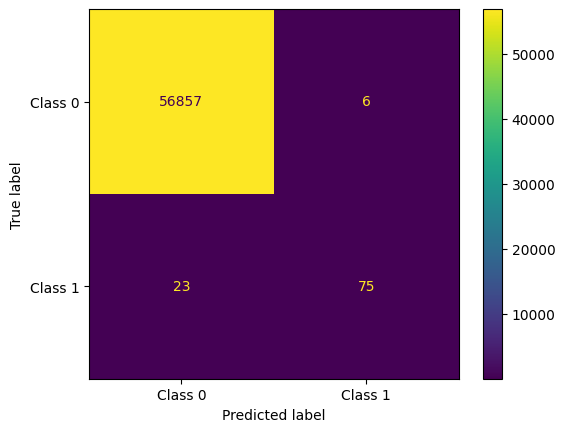

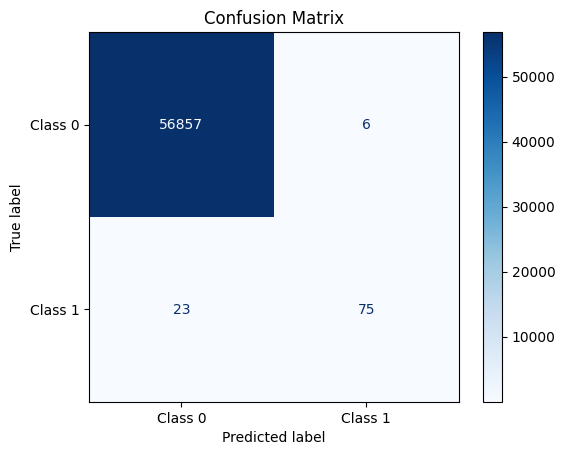

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9614705879186172
Random Forest threshold: 0.05
ROC for the test dataset: 96.1%


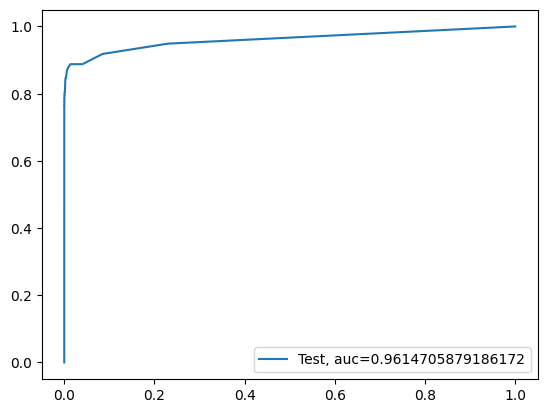

Time Taken by Model: --- 427.5665805339813 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


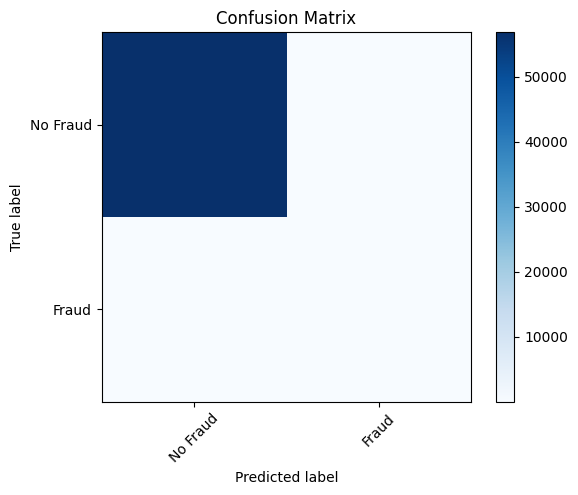

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.88      0.78      0.83        98

    accuracy                           1.00     56961
   macro avg       0.94      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.974152698555461
XGBoost threshold: 0.00022058551257941872
ROC for the test dataset 97.4%
Time Taken by Model: --- 220.96324801445007 seconds ---
--------------------------------------------------------------------------------


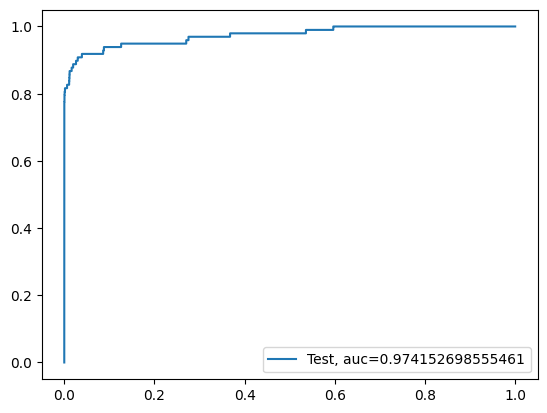

In [48]:
Data_Imbalance_Handling = "SMOTE OverSampling StratifiedKFold Cross Validation"

# Run Logistic Regression with L1 And L2 Regularization
print("Logistic Regression with L1 And L2 Regularization")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_train_SMOTE, y_train_SMOTE, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 80)

# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_train_SMOTE, y_train_SMOTE, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 80)

# Run Decision Tree Models with 'gini' and 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_train_SMOTE, y_train_SMOTE, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 80)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling, X_train_SMOTE, y_train_SMOTE, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 80)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_train_SMOTE, y_train_SMOTE, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 80)

In [49]:
#checking the df_results dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998876,0.981849,0.001499
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998876,0.881681,0.055936
2,RepeatedKfold Cross Validation,KNN,0.999368,0.906135,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.998999,0.852467,1.000000
4,RepeatedKFold Cross Validation,"Random Forest (n_estimators=100, max_depth=None)",0.999508,0.940354,0.040000
5,RepeatedKFold Cross Validation,XGBoost,0.999544,0.966141,0.000046
6,RepeatedKFold Cross Validation,SVM,0.997560,0.662081,0.001054
7,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998771,0.983387,0.001554
8,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998754,0.889076,0.021087
9,StratifiedKFold Cross Validation,KNN,0.999473,0.877453,0.200000


### Results for Random Oversampling  with StratifiedKFold Technique
Looking at the Accuracy and ROC value we have XGBoost which has provided best results for SMOTE Oversampling and StratifiedKFold technique

### Oversampling with ADASYN Oversampling
We will use ADASYN oversampling method to handle the class imbalance

In [50]:
# Creating the dataset with RondomOverSampler and StratifiedKFoLd
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling
skf = StratifiedKFold(n_splits = 5, random_state = None)
for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    ADASYN = over_sampling.ADASYN(random_state = 0)
    X_train_ADASYN , y_train_ADASYN = ADASYN.fit_resample(X_train, y_train)

X_train_ADASYN = pd.DataFrame(data = X_train_ADASYN, columns=cols)

Logistic Regression with L1 And L2 Regularization
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9835137791366966
Parameters for l1 regularization
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

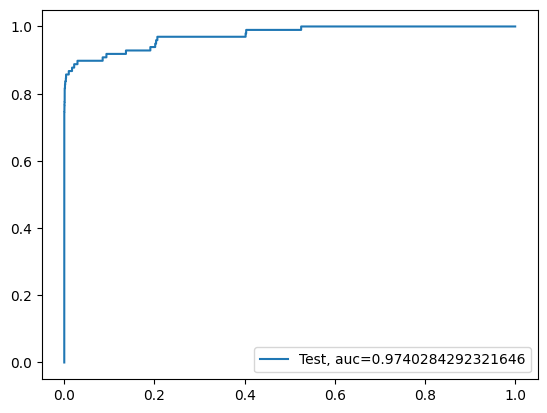

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


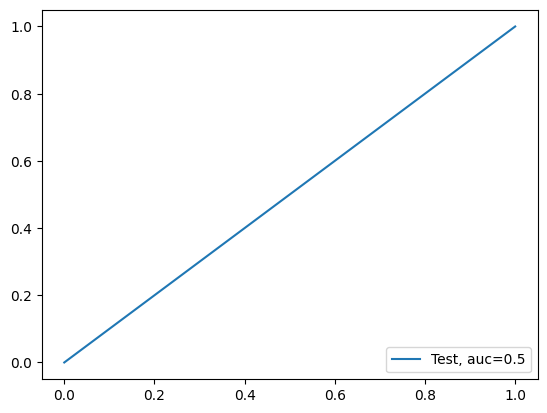

Time Taken by Model: --- 518.8227038383484 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.998490195045733
Confusion Matrix
[[56805    58]
 [   28    70]]
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.55      0.71      0.62        98

    accuracy                           1.00     56961
   macro avg       0.77      0.86      0.81     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8669478413386704
KNN threshold: 0.4
ROC for the test dataset 86.7%


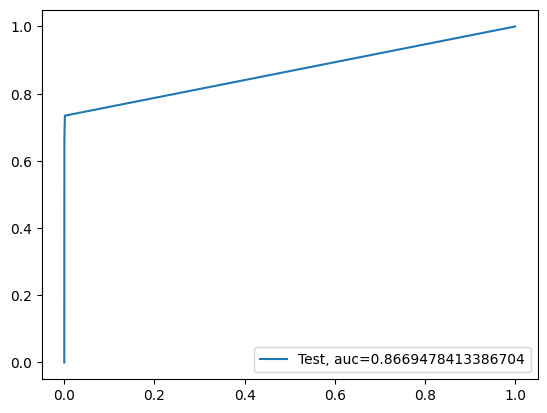

Time Taken by Model: --- 324.07997846603394 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.9979459630273345
Confusion Matrix


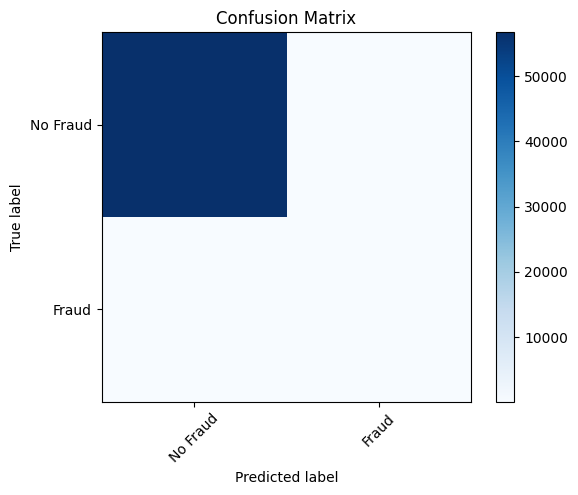

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.65      0.52        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8258007879303172
Tree threshold: 1.0
ROC for the test dataset 82.6%


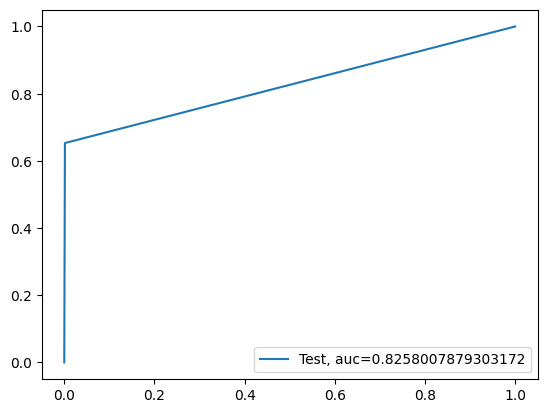

Time Taken by Model: --- 56.17774987220764 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995259914678464


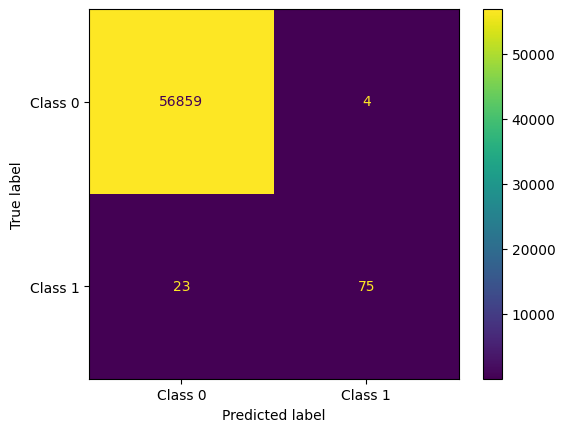

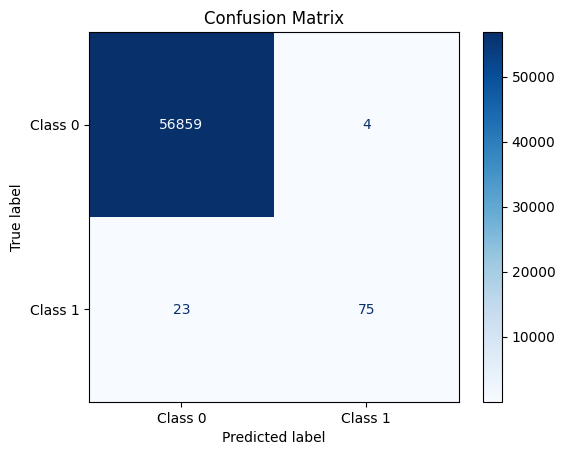

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9632269575962563
Random Forest threshold: 0.03
ROC for the test dataset: 96.3%


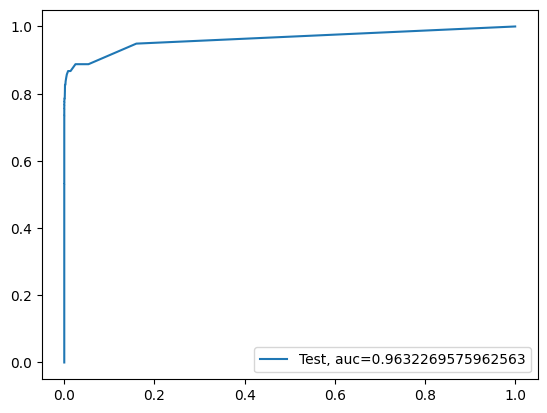

Time Taken by Model: --- 428.68141055107117 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9993855444953564
Confusion Matrix


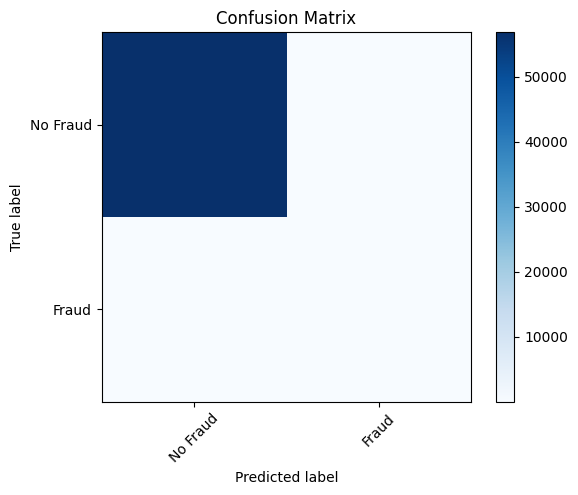

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.85      0.78      0.81        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9703206274156251
XGBoost threshold: 0.0016992067685350776
ROC for the test dataset 97.0%
Time Taken by Model: --- 227.58572459220886 seconds ---
--------------------------------------------------------------------------------


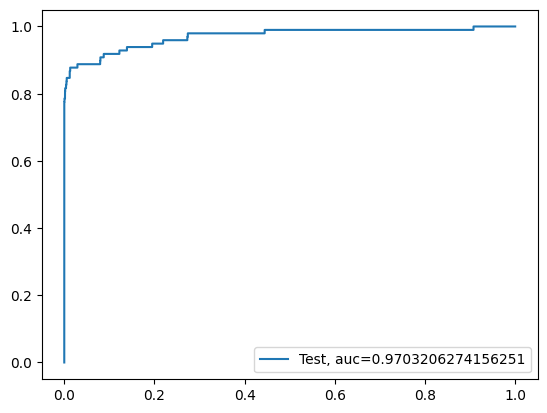

In [51]:
Data_Imbalance_Handling = "ADASYN OverSampling StratifiedKFold Cross Validation"

# Run Logistic Regression with L1 And L2 Regularization
print("Logistic Regression with L1 And L2 Regularization")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 80)

# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 80)

# Run Decision Tree Models with 'gini' and 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 80)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 80)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 80)

In [52]:
#checking the df_results dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998876,0.981849,0.001499
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998876,0.881681,0.055936
2,RepeatedKfold Cross Validation,KNN,0.999368,0.906135,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.998999,0.852467,1.000000
4,RepeatedKFold Cross Validation,"Random Forest (n_estimators=100, max_depth=None)",0.999508,0.940354,0.040000
5,RepeatedKFold Cross Validation,XGBoost,0.999544,0.966141,0.000046
6,RepeatedKFold Cross Validation,SVM,0.997560,0.662081,0.001054
7,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998771,0.983387,0.001554
8,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998754,0.889076,0.021087
9,StratifiedKFold Cross Validation,KNN,0.999473,0.877453,0.200000


### Results for ADASYN Oversampling  with StratifiedKFold Technique
Looking at the Accuracy and ROC value we have XGBoost which has provided best results for ADASYN Oversampling and StratifiedKFold technique

### Overall Conclusion on OverSampled Data
Looking at the Accuracy and ROC value we have XGBoost which has provided best results for all Oversampling and StratifiedKFold technique. So we will try to tune the hyperparameters of this model to get best results.

### Hyperparameter Tuning

### HPT - XGBoost Regression

In [53]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_test = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2),
    'n_estimators': range(60, 130, 10),  # Fixed the range and step size
    'learning_rate': [0.05, 0.1, 0.125, 0.15, 0.2],
    'gamma': [i / 10.0 for i in range(0, 5)],
    'subsample': [i / 10.0 for i in range(7, 10)],
    'colsample_bytree': [i / 10.0 for i in range(7, 10)]
}

gsearch1 = RandomizedSearchCV(
    estimator=XGBClassifier(
        base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, max_delta_step=0,
        missing=None, n_jobs=-1,
        nthread=None, objective='binary:logistic', random_state=42,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=None, verbosity=1
    ),
    param_distributions=param_test,
    n_iter=5,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5
)

gsearch1.fit(X_over, y_over)

print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)

{'mean_fit_time': array([153.68104463,  80.13226271, 135.34191146, 132.64514456,
       152.7063447 ]), 'std_fit_time': array([11.69147779,  1.67021067,  2.74011869,  1.00708156, 16.82995703]), 'mean_score_time': array([0.02010603, 0.01806569, 0.02118769, 0.01529546, 0.01423526]), 'std_score_time': array([0.00615812, 0.00541563, 0.01510654, 0.00256049, 0.00345364]), 'param_subsample': masked_array(data=[0.7, 0.7, 0.9, 0.7, 0.7],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[110, 60, 70, 90, 110],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[1, 5, 5, 1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[5, 5, 7, 5, 5],
             mask=[False, False, False, False, False],
       fill_value=

In [57]:
#Creating XGBoost model with selected hyperparameters
from xgboost import XGBClassifier

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
                    learning_rate=0.125, max_delta_step=0, max_depth=7,
                    min_child_weight=5, missing=1, n_estimators=60, n_jobs=1,
                    nthread=None, objective='binary:logistic', random_state=42,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=None, subsample=0.8, verbosity=1)

#fit on the dataset
clf.fit(X_over, y_over)
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGBoost roc_value: {0}".format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.999350432752234
XGBoost roc_value: 0.9821194837430602
XGBoost threshold: 0.010008693672716618


#### Print the important features of the best model to understand the dataset

In [61]:
imp_var = []
for i in clf.feature_importances_:
    imp_var.append(i)
print('Top var =', imp_var.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', imp_var.index(np.sort(clf.feature_importances_)[-2])+1)

# Check if there are at least 31 variables
if len(clf.feature_importances_) >= 31:
    print('3rd Top var =', imp_var.index(np.sort(clf.feature_importances_)[-31])+1)
else:
    print("There are fewer than 31 variables.")


Top var = 14
2nd Top var = 10
There are fewer than 31 variables.


In [62]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9821194837430602
XGBoost threshold: 0.010008693672716618


# Conclusion

In the oversample cases, of all the models we build found that the XGBOOST model with Random Oversampling with StratifiedKFold CV gave us the best accuracy and ROC on oversampled data. Post that we performed hyperparameter tuning and got the below metnces :

XGboost roc_value: 0.9815403079438694 XGBoost threshold: 0.01721232570707798

However, of all the models we created we found Logistic Regression with L2 Regularisation for StratifiedKrold cross validation (without any oversampling or undersampling) gave us the best result.